In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
df = pd.read_csv("../data/feature_selection_heart_disease.csv")

In [25]:
X = df.drop('num', axis=1)
target = df['num']


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow Method

In [27]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

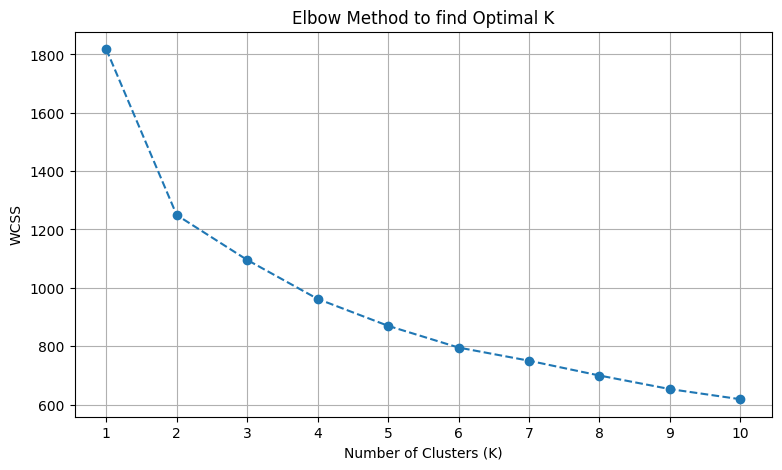

In [28]:
plt.figure(figsize=(9, 5))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

### K-Means Clustering Model

In [29]:
optimal_K = 2
kmeans = KMeans(n_clusters=optimal_K, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [30]:
df['KMeans_Cluster'] = clusters

In [31]:
print("K-Means Cluster Distribution:")
print(df['KMeans_Cluster'].value_counts())

K-Means Cluster Distribution:
KMeans_Cluster
1    188
0    115
Name: count, dtype: int64


### K-Means Clusters vs. Target Label

In [32]:
print("K-Means Clusters vs. Actual 'num' Label:")
print(pd.crosstab(df['KMeans_Cluster'], target))

K-Means Clusters vs. Actual 'num' Label:
num               0    1
KMeans_Cluster          
0                11  104
1               153   35


In [33]:
KMeans_target_data = {
    'Target': [0, 1],
    'Cluster_0': [11, 104],
    'Cluster_1': [153, 35]
}
df_kmean_crosstab = pd.DataFrame(KMeans_target_data).set_index('Target')
print(df_kmean_crosstab)

        Cluster_0  Cluster_1
Target                      
0              11        153
1             104         35


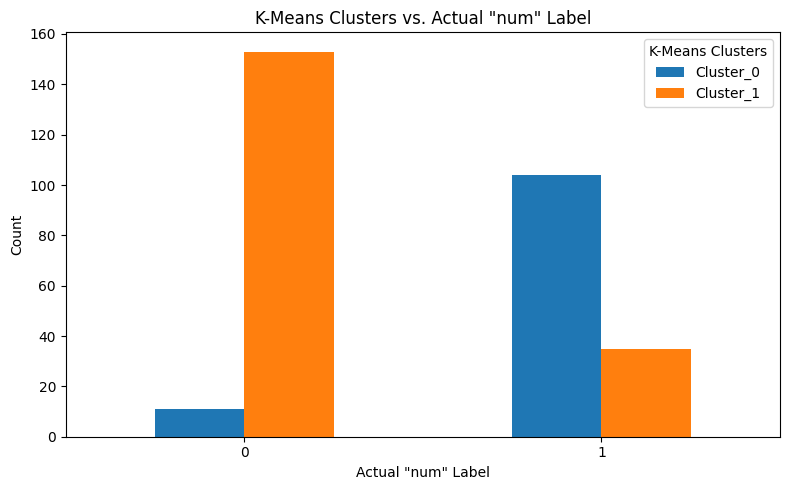

In [34]:
df_kmean_crosstab.plot(kind='bar', figsize=(8,5), rot=0)
plt.title('K-Means Clusters vs. Actual "num" Label')
plt.xlabel('Actual "num" Label')
plt.ylabel('Count')
plt.legend(title='K-Means Clusters')
plt.tight_layout()
plt.show()

In [35]:
kmeans_score = adjusted_rand_score(target, df['KMeans_Cluster'])
print(f"Adjusted Rand Index for K-Means: {kmeans_score:.4f}")

Adjusted Rand Index for K-Means: 0.4831


### Dendrogram analysis

In [36]:
linked = linkage(X_scaled, method='ward')

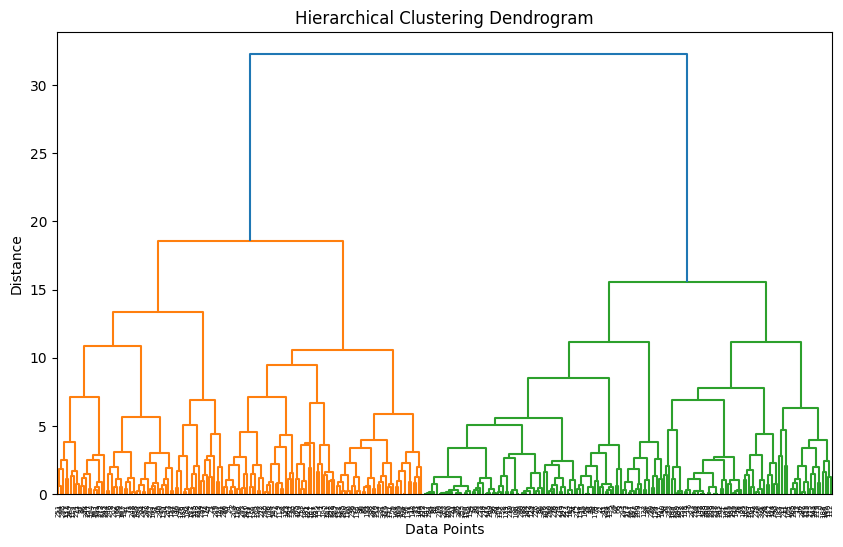

In [37]:
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### Hierarchical Clustering Model

In [38]:
agg_clustering = AgglomerativeClustering(n_clusters=optimal_K)
hierarchical_clusters = agg_clustering.fit_predict(X_scaled)

In [39]:
df['Hierarchical_Cluster'] = hierarchical_clusters

In [40]:
print("Hierarchical Cluster Distribution:")
print(df['Hierarchical_Cluster'].value_counts())

Hierarchical Cluster Distribution:
Hierarchical_Cluster
1    160
0    143
Name: count, dtype: int64


### Hierarchical Clusters vs. Target Label

In [41]:
print("Hierarchical Clusters vs. Actual 'num' Label:")
print(pd.crosstab(df['Hierarchical_Cluster'], target))

Hierarchical Clusters vs. Actual 'num' Label:
num                     0    1
Hierarchical_Cluster          
0                      31  112
1                     133   27


In [42]:
Hierarchical_target_data = {
    'Target': [0, 1],
    'Cluster_0': [31, 112],
    'Cluster_1': [133, 27]
}
df_hier_crosstab = pd.DataFrame(Hierarchical_target_data).set_index('Target')
print(df_hier_crosstab)

        Cluster_0  Cluster_1
Target                      
0              31        133
1             112         27


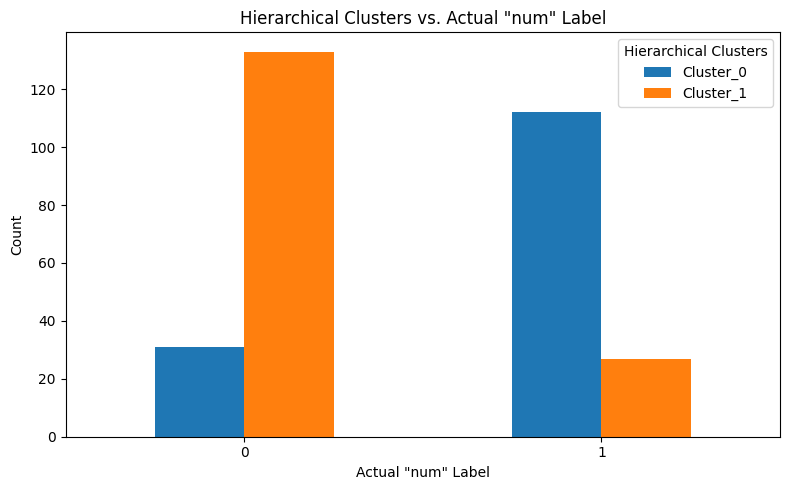

In [43]:
df_hier_crosstab.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title('Hierarchical Clusters vs. Actual "num" Label')
plt.xlabel('Actual "num" Label')
plt.ylabel('Count')
plt.legend(title='Hierarchical Clusters')
plt.tight_layout()
plt.show()

In [44]:
hierarhical_score = adjusted_rand_score(target, df['Hierarchical_Cluster'])
print(f"Adjusted Rand Index for Hierarchical Clustering: {hierarhical_score:.4f}")

Adjusted Rand Index for Hierarchical Clustering: 0.3788
